In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
from bs4 import BeautifulSoup

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

from sklearn.model_selection import train_test_split

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
dataset_train = pd.read_csv('train.csv')
dataset_test = pd.read_csv('test.csv')
dataset_val = pd.read_csv('val.csv')

In [ ]:
dataset_train

,source,source_labels,rouge_scores,paper_id,target
0,['Due to the success of deep learning to solvi...,"[0, 0, 0, 0, 1, 0]","[0.30188679695129395, 0.3720930218696594, 0.60...",SysEexbRb,['We provide necessary and sufficient analytic...
1,['The backpropagation (BP) algorithm is often ...,"[0, 0, 0, 1, 0, 0, 0, 0]","[0.0, 0.0, 0.1304347813129425, 0.1428571343421...",SygvZ209F7,"['Biologically plausible learning algorithms, ..."
2,"['We introduce the 2-simplicial Transformer, a...","[0, 1]","[0.3333333432674408, 0.8888888955116272]",rkecJ6VFvr,['We introduce the 2-simplicial Transformer an...
3,"['We present Tensor-Train RNN (TT-RNN), a nove...","[0, 0, 0, 1, 0, 0]","[0.06666666269302368, 0.06451612710952759, 0.0...",HJJ0w--0W,['Accurate forecasting over very long time hor...
4,['Recent efforts on combining deep models with...,"[0, 1, 0, 0, 0, 0, 0]","[0.277777761220932, 0.5714285373687744, 0.0952...",HyH9lbZAW,['We propose a variational message-passing alg...
...,...,...,...,...,...
1987,"['Semi-supervised learning, i.e. jointly learn...","[0, 0, 0, 1, 0, 0, 0]","[0.07999999821186066, 0.11538460850715637, 0.1...",rJel41BtDH,['Pseudo-labeling has shown to be a weak alter...
1988,['Model-free reinforcement learning (RL) has b...,"[0, 0, 0, 0, 1, 0, 0]","[0.09302324801683426, 0.08695651590824127, 0.0...",Skw0n-W0Z,['We show that a special goal-condition value ...
1989,['We introduce a neural architecture to perfor...,"[1, 0, 0, 0]","[0.46666666865348816, 0.0714285671710968, 0.0,...",rJgFtkhEtr,['A novel neural architecture for efficient am...
1990,['Machine learned large-scale retrieval system...,"[0, 0, 0, 1, 0, 0]","[0.277777761220932, 0.0, 0.2857142686843872, 0...",SJxPVcSonN,['We propose a novel two-tower shared-bottom m...


In [ ]:
dataset_train.isnull().sum()

source           0
source_labels    0
rouge_scores     0
paper_id         0
target           0
dtype: int64

In [ ]:
dataset_train['source'] = [i.lstrip('[').rstrip(']\n ') for i in dataset_train['source']]
dataset_train['target'] = [i.lstrip('[').rstrip(']\n ') for i in dataset_train['target']]
dataset_train['source'] = [i.lstrip('\'').rstrip('\'') for i in dataset_train['source']]
dataset_train['target'] = [i.lstrip('\'').rstrip('\'') for i in dataset_train['target']]

In [ ]:
dataset_train['source'] = [i.lower() for i in dataset_train['source']]
dataset_train['target'] = [i.lower() for i in dataset_train['target']]

In [ ]:
dataset_train

,source,source_labels,rouge_scores,paper_id,target
0,due to the success of deep learning to solving...,"[0, 0, 0, 0, 1, 0]","[0.30188679695129395, 0.3720930218696594, 0.60...",SysEexbRb,we provide necessary and sufficient analytical...
1,the backpropagation (bp) algorithm is often th...,"[0, 0, 0, 1, 0, 0, 0, 0]","[0.0, 0.0, 0.1304347813129425, 0.1428571343421...",SygvZ209F7,"biologically plausible learning algorithms, pa..."
2,"we introduce the 2-simplicial transformer, an ...","[0, 1]","[0.3333333432674408, 0.8888888955116272]",rkecJ6VFvr,we introduce the 2-simplicial transformer and ...
3,"we present tensor-train rnn (tt-rnn), a novel ...","[0, 0, 0, 1, 0, 0]","[0.06666666269302368, 0.06451612710952759, 0.0...",HJJ0w--0W,accurate forecasting over very long time horiz...
4,recent efforts on combining deep models with p...,"[0, 1, 0, 0, 0, 0, 0]","[0.277777761220932, 0.5714285373687744, 0.0952...",HyH9lbZAW,we propose a variational message-passing algor...
...,...,...,...,...,...
1987,"semi-supervised learning, i.e. jointly learnin...","[0, 0, 0, 1, 0, 0, 0]","[0.07999999821186066, 0.11538460850715637, 0.1...",rJel41BtDH,pseudo-labeling has shown to be a weak alterna...
1988,model-free reinforcement learning (rl) has bee...,"[0, 0, 0, 0, 1, 0, 0]","[0.09302324801683426, 0.08695651590824127, 0.0...",Skw0n-W0Z,we show that a special goal-condition value fu...
1989,we introduce a neural architecture to perform ...,"[1, 0, 0, 0]","[0.46666666865348816, 0.0714285671710968, 0.0,...",rJgFtkhEtr,a novel neural architecture for efficient amor...
1990,machine learned large-scale retrieval systems ...,"[0, 0, 0, 1, 0, 0]","[0.277777761220932, 0.0, 0.2857142686843872, 0...",SJxPVcSonN,we propose a novel two-tower shared-bottom mod...


In [ ]:
stop_words = set(stopwords.words('english'))

def cleaning(text,num):
  str = text.lower()
  str = re.sub('"','', str)

  str = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in str.split(" ")])
  str = re.sub(r"'s\b","",str)
  str = re.sub("[^a-zA-Z]", " ", str)
  str = re.sub('[m]{2,}', 'mm', str)
  if(num==0):
    str = re.sub(r'\.',' . ',str)
  if(num==0):
      tokens = [w for w in str.split() if not w in stop_words]

  else:
      tokens=str.split()
  long_words=[]
  for i in tokens:
      if len(i)>1:                                                 #removing short words
          long_words.append(i)
  return (" ".join(long_words)).strip()

In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not","didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not","he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is","I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would","i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would","it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam","mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have","mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have","she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is","should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as","this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would","there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have","they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have","wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are","we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are","what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is","where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have","why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have","would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all","y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have","you're": "you are", "you've": "you have"}

In [ ]:
clean_source = []
for t in dataset_train['source']:
    clean_source.append(cleaning(t,0))

clean_target = []
for t in dataset_train['target']:
    clean_target.append(cleaning(t,0))

In [ ]:
dataset_train['source'] = clean_source
dataset_train['target'] = clean_target

dataset_train.replace('', np.nan, inplace=True)
dataset_train.dropna(axis=0,inplace=True)

In [ ]:
dataset_train

,source,source_labels,rouge_scores,paper_id,target
0,due success deep learning solving variety chal...,"[0, 0, 0, 0, 1, 0]","[0.30188679695129395, 0.3720930218696594, 0.60...",SysEexbRb,provide necessary sufficient analytical forms ...
1,backpropagation bp algorithm often thought bio...,"[0, 0, 0, 1, 0, 0, 0, 0]","[0.0, 0.0, 0.1304347813129425, 0.1428571343421...",SygvZ209F7,biologically plausible learning algorithms par...
2,introduce simplicial transformer extension tra...,"[0, 1]","[0.3333333432674408, 0.8888888955116272]",rkecJ6VFvr,introduce simplicial transformer show architec...
3,present tensor train rnn tt rnn novel family n...,"[0, 0, 0, 1, 0, 0]","[0.06666666269302368, 0.06451612710952759, 0.0...",HJJ0w--0W,accurate forecasting long time horizons using ...
4,recent efforts combining deep models probabili...,"[0, 1, 0, 0, 0, 0, 0]","[0.277777761220932, 0.5714285373687744, 0.0952...",HyH9lbZAW,propose variational message passing algorithm ...
...,...,...,...,...,...
1987,semi supervised learning jointly learning labe...,"[0, 0, 0, 1, 0, 0, 0]","[0.07999999821186066, 0.11538460850715637, 0.1...",rJel41BtDH,pseudo labeling shown weak alternative semi su...
1988,model free reinforcement learning rl proven po...,"[0, 0, 0, 0, 1, 0, 0]","[0.09302324801683426, 0.08695651590824127, 0.0...",Skw0n-W0Z,show special goal condition value function tra...
1989,introduce neural architecture perform amortize...,"[1, 0, 0, 0]","[0.46666666865348816, 0.0714285671710968, 0.0,...",rJgFtkhEtr,novel neural architecture efficient amortized ...
1990,machine learned large scale retrieval systems ...,"[0, 0, 0, 1, 0, 0]","[0.277777761220932, 0.0, 0.2857142686843872, 0...",SJxPVcSonN,propose novel two tower shared bottom model ar...


In [ ]:
source_word_count = []
target_word_count = []

# populate the lists with sentence lengths
for i in dataset_train['source']:
      temp=i.split()
      source_word_count.append(len(temp))

for j in dataset_train['target']:
  temp1=j.split()
  target_word_count.append(len(temp1))

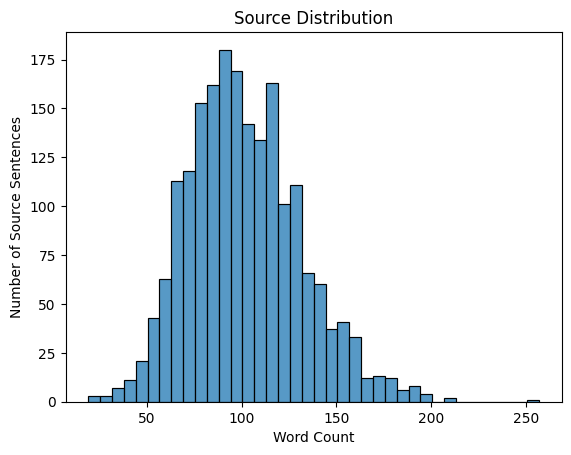

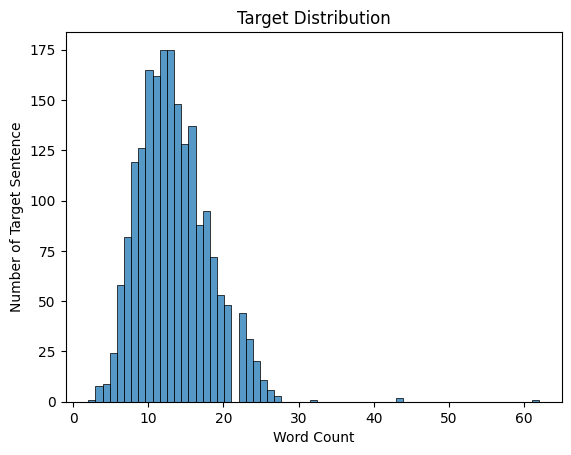

In [ ]:
sns.histplot(source_word_count)
plt.title('Source Distribution')
plt.xlabel('Word Count')
plt.ylabel('Number of Source Sentences')
plt.show()

sns.histplot(target_word_count)
plt.title('Target Distribution')
plt.xlabel('Word Count')
plt.ylabel('Number of Target Sentence')
plt.show()

In [ ]:
dataset_test['source'] = [i.lstrip('[').rstrip(']\n ') for i in dataset_test['source']]
dataset_test['target'] = [i.lstrip('[').rstrip(']\n ') for i in dataset_test['target']]
dataset_test['source'] = [i.lstrip('\'').rstrip('\'') for i in dataset_test['source']]
dataset_test['target'] = [i.lstrip('\'').rstrip('\'') for i in dataset_test['target']]
dataset_val['source'] = [i.lstrip('[').rstrip(']\n ') for i in dataset_val['source']]
dataset_val['target'] = [i.lstrip('[').rstrip(']\n ') for i in dataset_val['target']]
dataset_val['source'] = [i.lstrip('\'').rstrip('\'') for i in dataset_val['source']]
dataset_val['target'] = [i.lstrip('\'').rstrip('\'') for i in dataset_val['target']]

In [ ]:
dataset_test['source'] = [i.lower() for i in dataset_test['source']]
dataset_test['target'] = [i.lower() for i in dataset_test['target']]
dataset_val['source'] = [i.lower() for i in dataset_val['source']]
dataset_val['target'] = [i.lower() for i in dataset_val['target']]

In [ ]:
clean_source_test = []
for t in dataset_test['source']:
    clean_source_test.append(cleaning(t,0))

clean_target_test = []
for t in dataset_test['target']:
    clean_target_test.append(cleaning(t,0))

clean_source_val = []
for t in dataset_val['source']:
    clean_source_val.append(cleaning(t,0))

clean_target_val = []
for t in dataset_val['target']:
    clean_target_val.append(cleaning(t,0))

In [ ]:
dataset_test['source'] = clean_source_test
dataset_test['target'] = clean_target_test
dataset_val['source'] = clean_source_val
dataset_val['target'] = clean_target_val

dataset_test.replace('', np.nan, inplace=True)
dataset_test.dropna(axis=0,inplace=True)
dataset_val.replace('', np.nan, inplace=True)
dataset_val.dropna(axis=0,inplace=True)

In [ ]:
X_train, Y_train = dataset_train['source'], dataset_train['target']
X_test, Y_test = dataset_test['source'], dataset_test['target']

In [ ]:
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

1992
1992
618
618


In [ ]:
SOS_token = 0
EOS_token = 1

class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # Count SOS and EOS

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1


In [ ]:
def readLangs(text, summary, reverse=False):
    print("Reading lines...")

    # Split every line into pairs and normalize
    text=np.array(text)
    summary=np.array(summary)
    pairs = [[text[i],summary[i]] for i in range(len(text))]

    # Reverse pairs, make Lang instances
    if reverse:
        pairs = [list(reversed(p)) for p in pairs]
        input_lang = Lang(summary)
        output_lang = Lang(text)
    else:
        input_lang = Lang(text)
        output_lang = Lang(summary)

    return input_lang, output_lang, pairs

In [ ]:
def prepareData(lang1, lang2, reverse=False):
    input_lang, output_lang, pairs = readLangs(lang1, lang2, reverse)
    print("Read %s sentence pairs" % len(pairs))
    print("Counting words...")
    for pair in pairs:
        input_lang.addSentence(pair[0])
        output_lang.addSentence(pair[1])
    print("Counted words:")
    print(input_lang.name,"--------------------", input_lang.n_words)
    #print(output_lang.name, output_lang.n_words)
    return input_lang, output_lang, pairs


In [ ]:
input_lang, output_lang, pairs = prepareData(X_train, Y_train , False)

Reading lines...
Read 1992 sentence pairs
Counting words...
Counted words:
['due success deep learning solving variety challenging machine learning tasks rising interest understanding loss functions training neural networks theoretical aspect particularly properties critical points landscape around importance determine convergence performance optimization algorithms paper provide necessary sufficient characterization analytical forms critical points well global minimizers square loss functions linear neural networks show analytical forms critical points characterize values corresponding loss functions well necessary sufficient conditions achieve global minimum furthermore exploit analytical forms critical points characterize landscape properties loss functions linear neural networks shallow relu networks one particular conclusion loss function linear networks spurious local minimum loss function one hidden layer nonlinear networks relu activation function local minimum global minimum'


In [ ]:
pairs[1]

['backpropagation bp algorithm often thought biologically implausible brain one main reasons bp requires symmetric weight matrices feedforward feedback pathways address weight transport problem grossberg two biologically plausible algorithms proposed liao et al lillicrap et al relax bp weight symmetry requirements demonstrate comparable learning capabilities bp small datasets however recent study bartunov et al finds although feedback alignment fa variants target propagation tp perform well mnist cifar perform significantly worse bp imagenet additionally evaluate sign symmetry ss algorithm liao et al differs bp fa feedback feedforward weights share magnitudes share signs examined performance sign symmetry feedback alignment imagenet ms coco datasets using different network architectures resnet alexnet imagenet retinanet ms coco surprisingly networks trained sign symmetry attain classification performance approaching bp trained networks results complement study bartunov et al establish 

In [ ]:
SOS_token = 0
EOS_token = 1

In [ ]:
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]

def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)

def tensorsFromPair(pair):
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return (input_tensor, target_tensor)

In [ ]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output = embedded
        output, hidden = self.gru(output, hidden)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)


In [ ]:
class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(DecoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(output_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        output = self.embedding(input).view(1, 1, -1)
        output = F.relu(output)
        output, hidden = self.gru(output, hidden)
        output = self.softmax(self.out(output[0]))
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [ ]:
MAX_LENGTH = 257

In [ ]:
class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size * 2, self.max_length)
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        attn_weights = F.softmax(
            self.attn(torch.cat((embedded[0], hidden[0]), 1)), dim=1)
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))

        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = F.relu(output)
        output, hidden = self.gru(output, hidden)

        output = F.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [ ]:
def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=MAX_LENGTH):
    encoder_hidden = encoder.initHidden()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

    loss = 0
    #print('bbbbbbb-->>> input length', input_length)

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)
        #print("priting before error")
        #print(encoder_output.size())
        #print(encoder_outputs.size())
        temp = encoder_output[0, 0]
        #print(temp)
        encoder_outputs[ei] = temp

    decoder_input = torch.tensor([[SOS_token]], device=device)

    decoder_hidden = encoder_hidden

    #use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False
    #Without teacher forcing: use its own predictions as the next input

    #print('aaaaa-->>>')

    for di in range(target_length):
      decoder_output, decoder_hidden, decoder_attention = decoder(
      decoder_input, decoder_hidden, encoder_outputs)
      topv, topi = decoder_output.topk(1)

      decoder_input = topi.squeeze().detach()  # detach from history as input

      loss += criterion(decoder_output, target_tensor[di])

      if decoder_input.item() == EOS_token:
             break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length

In [ ]:
import time
import math


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

In [ ]:

import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np


def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

In [ ]:
def trainIters(encoder, decoder, n_iters, print_every=1000, plot_every=100, learning_rate=0.01):
    print("Training....")
    start = time.time()
    plot_losses = []
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    training_pairs = [tensorsFromPair(random.choice(pairs))
                      for i in range(n_iters)]
    criterion = nn.NLLLoss()

    for iter in range(1, n_iters + 1):
        if iter% 1000 == 0:
            print(iter,"/",n_iters + 1)
        training_pair = training_pairs[iter - 1]
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]

        input_length = input_tensor.size(0)
        if(input_length > 150):
          #print(input_length)
          continue

        loss = train(input_tensor, target_tensor, encoder,decoder, encoder_optimizer, decoder_optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if iter % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print('%s (%d %d%%) %.4f' % (timeSince(start, iter / n_iters),
                                         iter, iter / n_iters * 100, print_loss_avg))

        if iter % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0

    showPlot(plot_losses)

In [ ]:
def evaluate(encoder, decoder, sentence, max_length=MAX_LENGTH):
    with torch.no_grad():
        input_tensor = tensorFromSentence(input_lang, sentence)
        input_length = input_tensor.size()[0]
        encoder_hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei],encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_token]], device=device)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []
        decoder_attentions = torch.zeros(max_length, max_length)

        #print('cccccc->>>>')

        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            decoder_attentions[di] = decoder_attention.data
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == EOS_token:
                decoded_words.append('')
                break
            else:
                decoded_words.append(output_lang.index2word[topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words, decoder_attentions[:di + 1]

In [ ]:
def evaluateRandomly(encoder, decoder, n=5):
    text=list()
    headline=list()
    pred_headline=list()
    for i in range(n):
        pair = random.choice(pairs)

        if(len(pair[0].split())>=150):
          continue
        else:
          if(i%1000==0):
            print(i*100/n,"% complete")

          #print('>', pair[0])
          text.append(pair[0])
          #print('=', pair[1])
          headline.append(pair[1])
          output_words, attentions = evaluate(encoder, decoder, pair[0])
          output_sentence = ' '.join(output_words)
          pred_headline.append(output_sentence)
          #print('<', output_sentence)
          #print('')
    return(text,headline,pred_headline)

In [ ]:
hidden_size = 300
encoder1 = EncoderRNN(input_lang.n_words, hidden_size).to(device)
attn_decoder1 = AttnDecoderRNN(hidden_size, output_lang.n_words, dropout_p=0.1).to(device)

trainIters(encoder1, attn_decoder1, 150000, print_every=1000)

Training....
1000 / 150001
1m 24s (- 209m 24s) (1000 0%) 3.1793
2000 / 150001
2m 33s (- 188m 54s) (2000 1%) 3.3808
3000 / 150001
3m 45s (- 183m 57s) (3000 2%) 3.5918
4000 / 150001
4m 57s (- 181m 3s) (4000 2%) 3.5703
5000 / 150001
6m 7s (- 177m 44s) (5000 3%) 3.3091
6000 / 150001
7m 18s (- 175m 28s) (6000 4%) 3.3046
7000 / 150001
8m 29s (- 173m 35s) (7000 4%) 3.4620
8000 / 150001
9m 42s (- 172m 17s) (8000 5%) 3.4083
9000 / 150001
10m 54s (- 170m 49s) (9000 6%) 3.3354
10000 / 150001
12m 8s (- 169m 56s) (10000 6%) 3.2677
11000 / 150001
12000 / 150001
14m 36s (- 168m 1s) (12000 8%) 6.3670
13000 / 150001
14000 / 150001
17m 6s (- 166m 13s) (14000 9%) 5.7971
15000 / 150001
18m 23s (- 165m 30s) (15000 10%) 2.8228
16000 / 150001
19m 39s (- 164m 39s) (16000 10%) 2.7073
17000 / 150001
20m 56s (- 163m 50s) (17000 11%) 2.6440
18000 / 150001
22m 13s (- 163m 0s) (18000 12%) 2.5205
19000 / 150001
23m 32s (- 162m 18s) (19000 12%) 2.4343
20000 / 150001
24m 49s (- 161m 24s) (20000 13%) 2.3129
21000 / 150

In [ ]:
text,headline,pred_headline=evaluateRandomly(encoder1, attn_decoder1,15000)

pred_df_LSTM=pd.DataFrame()

pred_df_LSTM['text']=text
pred_df_LSTM['headline']=headline
pred_df_LSTM['pred_headline']=pred_headline

0.0 % complete
6.666666666666667 % complete
13.333333333333334 % complete
20.0 % complete
26.666666666666668 % complete
33.333333333333336 % complete
40.0 % complete
46.666666666666664 % complete
53.333333333333336 % complete
60.0 % complete
66.66666666666667 % complete
80.0 % complete
86.66666666666667 % complete
93.33333333333333 % complete


In [ ]:
for i in range(10,110):
  print("original Summary>>>",pred_df_LSTM.iloc[i]['headline'])
  print("Predicted Summary>>>",pred_df_LSTM.iloc[i]['pred_headline'])
  print('-----------------------------------------------------------------------')

original Summary>>> introduce php model hierarchical representation neural programs algorithm learning phps mixture strong weak supervision
Predicted Summary>>> introduce php model hierarchical representation neural programs algorithm learning phps mixture strong weak supervision 
-----------------------------------------------------------------------
original Summary>>> loopgan extends cycle length cyclegan enable unaligned sequential transformation two time steps
Predicted Summary>>> loopgan extends cycle length cyclegan enable unaligned sequential transformation two time steps 
-----------------------------------------------------------------------
original Summary>>> present kg reinforcement learning agent builds dynamic knowledge graph exploring generates natural language using template based action space outperforming current agents wide set text based games
Predicted Summary>>> present kg reinforcement learning agent builds dynamic knowledge graph exploring generates natural lan

In [ ]:
for i in range(0,1500):
  print("original Summary>>>",pred_df_LSTM.iloc[i]['headline'])
  print("Predicted Summary>>>",pred_df_LSTM.iloc[i]['pred_headline'])
  print('-----------------------------------------------------------------------')

original Summary>>> developed search framework consistency penalty mitigate delusional bias
Predicted Summary>>> developed rl 
-----------------------------------------------------------------------
original Summary>>> propose cnn neuron ranking two different methods show consistency producing result allows interpret network deems important compress network keeping relevant nodes
Predicted Summary>>> propose rl variational semantic 
-----------------------------------------------------------------------
original Summary>>> novel approach curriculum learning incrementally learning labels adaptively smoothing labels mis classified samples boost average performance decreases standard deviation
Predicted Summary>>> propose active incrementally 
-----------------------------------------------------------------------
original Summary>>> propose novel bit format eliminates need loss scaling stochastic rounding low precision techniques
Predicted Summary>>> propose eliminates eliminates elimina

In [ ]:
def calculate_rogue(src_trg, pred_trg):

  #cut off  token
  pred_trg = pred_trg[:-6]


  if (len(pred_trg) == 0):
    rogue_score = 0.0
  else:
    s = rouge.get_scores(pred_trg, src_trg, avg= True)
    rogue_score = s['rouge-1']['f']

  return s

In [ ]:
attn_plot_threshold = 0.45

def evaluateRandomlyprint_1(encoder, decoder, n=5):
    text=list()
    headline=list()
    pred_headline=list()

    for i in range(n):
        pair = random.choice(pairs)

        if(len(pair[0].split())>=150):
          continue
        else:
          #if(i%1000==0):
           # print(i*100/n,"% complete")

          tokenized_input = nltk.word_tokenize(pair[0])
          #print(len(tokenized_input))
          output_words, attentions = evaluate(encoder, decoder, pair[0])

          output_sentence = ' '.join(output_words)

          #get rogue f-score -- need to pass tokenized version here
          #print(pair[0])
          #print(output_sentence)
          score = calculate_rogue(pair[0], output_sentence)
          print(score)

          print('pair: ', pair[0])
          print('output sentence: ', output_sentence)
          print('')
    return(text,headline,pred_headline)


In [ ]:
!pip install rouge
import nltk
nltk.download('punkt')
from rouge import Rouge

rouge = Rouge()


evaluateRandomlyprint_1(encoder1, attn_decoder1,15000)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


{'rouge-1': {'r': 0.011904761904761904, 'p': 0.25, 'f': 0.022727271859504163}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.011904761904761904, 'p': 0.25, 'f': 0.022727271859504163}}
pair:  inspired combination feedforward iterative computations visual cortex taking advantage ability denoising autoencoders estimate score joint distribution propose novel approach iterative inference capturing exploiting complex joint distribution output variables conditioned input variables approach applied image pixel wise segmentation estimated conditional score used perform gradient ascent towards mode estimated conditional distribution extends previous work score estimation denoising autoencoders case conditional distribution novel use corrupted feedforward predictor replacing gaussian corruption advantage approach classical ways perform iterative inference structured outputs like conditional random fields crfs necessary define explicit energy function linking output variables keep 

UnboundLocalError: ignored